In [20]:
from pycaret.datasets import get_data
data = get_data('insurance')

In [21]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Experiment 1.

In [22]:
from pycaret.regression import *

In [23]:
s = setup(data, target = 'charges', session_id = 123)

In [24]:
lr = create_model('lr')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:36:25
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

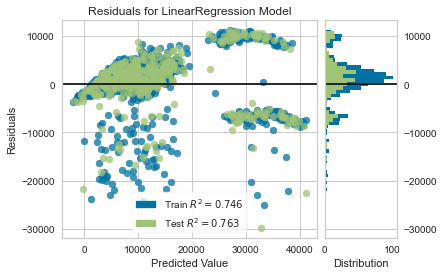

In [25]:
plot_model(lr)

# Experiment 2

In [17]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True,
           bin_numeric_features= ['age', 'bmi'])

ValueError: at least one array or dtype is required

In [7]:
s2[0].columns

NameError: name 's2' is not defined

In [10]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2476.5333,1.792665e+07,4233.9880,0.8929,0.3878,0.2842
1,3355.1345,3.404316e+07,5834.6515,0.8021,0.4613,0.3304
2,2919.7578,2.261994e+07,4756.0423,0.7136,0.5533,0.3790
3,2964.9649,2.283861e+07,4778.9761,0.8093,0.5456,0.4029
4,3097.0904,2.838265e+07,5327.5369,0.7889,0.5248,0.2831
5,2979.1330,2.035337e+07,4511.4710,0.8691,0.3543,0.2744
6,2687.7389,2.234181e+07,4726.7128,0.8480,0.4020,0.3279
7,3123.5060,2.697542e+07,5193.7863,0.8517,0.4707,0.3089
8,2813.0890,2.055905e+07,4534.2087,0.8672,0.3759,0.3151
9,3110.4590,2.651683e+07,5149.4496,0.8292,0.4661,0.3353


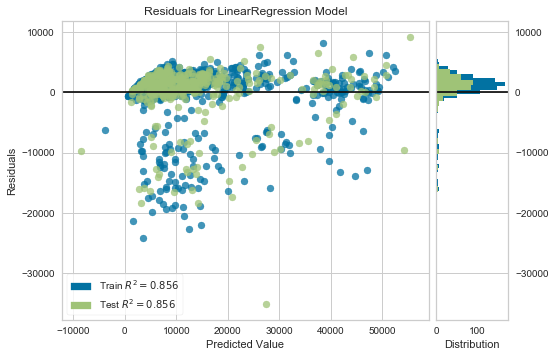

In [11]:
plot_model(lr)

In [26]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=D:\TEMP\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(fill_value='constant',
                                                               strategy='constant'))),
                 ('ordinal_encoding',
                  TransformerWrapper(includ...
                                                                                      'male': 1}},
                                                                         {'col': 'smoker',
                                                                          'mapping': {nan: -1,
                                                                                      'no': 0,
                 

In [27]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [28]:
deployment_28042020

Pipeline(memory=Memory(location=D:\TEMP\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(fill_value='constant',
                                                              strategy='constant'))),
                ('ordinal_encoding',
                 TransformerWrapper(includ...
                                                                                     'male': 1}},
                                                                        {'col': 'smoker',
                                                                         'mapping': {nan: -1,
                                                                                     'no': 0,
                                                                                     'yes': 1}}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('low_variance',
                 TransformerWrapper(exclude=[],
                                    transformer=VarianceThreshold(threshold=0))),
                ['trained_model', LinearRegression(n_jobs=-1)]])

In [15]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':57, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)